In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import train

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
train_df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


NaN processing

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [4]:
train_df.loc[train_df['Academic Pressure'].notna() | train_df['Work Pressure'].notna()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [5]:
train_df["Pressure"] = train_df.apply(
    lambda x: x["Academic Pressure"] if x["Working Professional or Student"] == "Student" else x["Work Pressure"],
    axis=1
)
test_df["Pressure"] = test_df.apply(
    lambda x: x["Academic Pressure"] if x["Working Professional or Student"] == "Student" else x["Work Pressure"],
    axis=1
)
train_df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,...,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,5.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,...,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,4.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,...,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,...,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,...,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0


In [6]:
train_df.loc[train_df["Pressure"].isna()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure
15846,15846,Shrey,Male,53.0,Vasai-Virar,Working Professional,NaN,NaN,NaN,NaN,...,5.0,More than 8 hours,Unhealthy,Class 12,No,12.0,1.0,No,0,NaN
17549,17549,Tanya,Female,20.0,Patna,Student,NaN,NaN,NaN,5.55,...,NaN,5-6 hours,Moderate,Class 12,No,0.0,3.0,Yes,0,NaN
18752,18752,Aarti,Female,18.0,Kalyan,Working Professional,NaN,2.0,NaN,8.14,...,NaN,Less than 5 hours,Healthy,Class 12,Yes,7.0,1.0,Yes,1,NaN
21880,21880,Aarush,Male,38.0,Chennai,Student,NaN,NaN,5.0,NaN,...,4.0,5-6 hours,Healthy,Class 12,No,2.0,3.0,No,0,NaN
34694,34694,Kriti,Female,46.0,Meerut,Working Professional,NaN,NaN,NaN,NaN,...,NaN,5-6 hours,Moderate,Class 12,Yes,12.0,3.0,No,0,NaN
35612,35612,Siddhesh,Male,27.0,Vadodara,Working Professional,NaN,NaN,NaN,NaN,...,NaN,Less than 5 hours,Unhealthy,B.Pharm,No,11.0,3.0,No,1,NaN
41915,41915,Advait,Male,18.0,Kolkata,Working Professional,NaN,4.0,NaN,8.04,...,NaN,5-6 hours,Healthy,Class 12,Yes,1.0,5.0,Yes,1,NaN
55827,55827,Prachi,Female,19.0,Kalyan,Working Professional,NaN,3.0,NaN,8.11,...,NaN,5-6 hours,Unhealthy,Class 12,Yes,4.0,4.0,No,1,NaN
57196,57196,Manvi,Female,20.0,Visakhapatnam,Working Professional,NaN,NaN,NaN,NaN,...,NaN,Less than 5 hours,Moderate,Class 12,No,0.0,4.0,Yes,1,NaN
60348,60348,Nishant,Male,29.0,Agra,Working Professional,NaN,NaN,NaN,9.72,...,NaN,5-6 hours,Moderate,B.Ed,No,7.0,2.0,Yes,0,NaN


In [7]:
train_df = train_df.drop(train_df[train_df["Pressure"].isna()].index, axis=0)
train_df = train_df.drop(columns=['Academic Pressure', 'Work Pressure'], axis=1)
test_df = test_df.drop(columns=['Academic Pressure', 'Work Pressure'], axis=1)
test_df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Pressure
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes,2.0
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No,2.0
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No,4.0
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No,5.0
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No,5.0


In [8]:
train_df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,5.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,4.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0


In [9]:
(train_df.isnull().sum() / len(train_df)).sort_values(ascending=False).head(10)

CGPA                                0.801743
Study Satisfaction                  0.801743
Profession                          0.260203
Job Satisfaction                    0.198300
Dietary Habits                      0.000028
Financial Stress                    0.000028
Degree                              0.000014
Depression                          0.000000
Family History of Mental Illness    0.000000
Work/Study Hours                    0.000000
dtype: float64

In [10]:
train_df = train_df.drop(columns=["CGPA"])
train_df["Study/Job Satisfaction"] = train_df.apply(
    lambda x: x["Study Satisfaction"] if x["Working Professional or Student"] == "Student" else x["Job Satisfaction"],
    axis=1
)
train_df = train_df.drop(columns=["Study Satisfaction", "Job Satisfaction"])
test_df = test_df.drop(columns=["CGPA"])
test_df["Study/Job Satisfaction"] = test_df.apply(
    lambda x: x["Study Satisfaction"] if x["Working Professional or Student"] == "Student" else x["Job Satisfaction"],
    axis=1
)
test_df = test_df.drop(columns=["Study Satisfaction", "Job Satisfaction"])

In [11]:
(train_df.isnull().sum() / len(train_df)).sort_values(ascending=False).head(10)

Profession                         0.260203
Study/Job Satisfaction             0.000057
Financial Stress                   0.000028
Dietary Habits                     0.000028
Degree                             0.000014
City                               0.000000
Working Professional or Student    0.000000
Age                                0.000000
Sleep Duration                     0.000000
Name                               0.000000
dtype: float64

In [12]:
(test_df.isnull().sum() / len(test_df)).sort_values(ascending=False).head(10)

Profession                0.262601
Pressure                  0.000181
Study/Job Satisfaction    0.000181
Dietary Habits            0.000053
Degree                    0.000021
id                        0.000000
Name                      0.000000
Gender                    0.000000
Age                       0.000000
City                      0.000000
dtype: float64

In [13]:
train_df["Profession"] = train_df.apply(
    lambda x: "Student" if x['Working Professional or Student'] == "Student" else x["Profession"],
    axis = 1
)
test_df["Profession"] = test_df.apply(
    lambda x: "Student" if x['Working Professional or Student'] == "Student" else x["Profession"],
    axis = 1
)

In [14]:
(train_df.isnull().sum() / len(train_df)).sort_values(ascending=False).head(10)

Profession                         0.062166
Study/Job Satisfaction             0.000057
Financial Stress                   0.000028
Dietary Habits                     0.000028
Degree                             0.000014
City                               0.000000
Working Professional or Student    0.000000
Age                                0.000000
Sleep Duration                     0.000000
Name                               0.000000
dtype: float64

In [15]:
train_df.loc[train_df["Profession"].isna()].head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Study/Job Satisfaction
29,29,Kashish,Female,19.0,Agra,Working Professional,NaN,More than 8 hours,Healthy,Class 12,No,5.0,2.0,No,0,1.0,5.0
36,36,Anvi,Female,50.0,Kalyan,Working Professional,NaN,7-8 hours,Unhealthy,Class 12,No,0.0,2.0,No,0,4.0,4.0
43,43,Vidya,Female,18.0,Vadodara,Working Professional,NaN,Less than 5 hours,Moderate,Class 12,Yes,10.0,5.0,No,1,5.0,4.0
48,48,Anand,Male,38.0,Ghaziabad,Working Professional,NaN,5-6 hours,Moderate,Class 12,No,1.0,1.0,Yes,0,2.0,5.0
50,50,Raunak,Male,21.0,Pune,Working Professional,NaN,5-6 hours,Healthy,Class 12,Yes,8.0,5.0,Yes,0,4.0,5.0


In [16]:
train_df["Profession"] = train_df["Profession"].fillna("Self Employed")
test_df["Profession"] = test_df["Profession"].fillna("Self Employed")
train_df.loc[train_df["Profession"] == "Self Employed"].head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Study/Job Satisfaction
29,29,Kashish,Female,19.0,Agra,Working Professional,Self Employed,More than 8 hours,Healthy,Class 12,No,5.0,2.0,No,0,1.0,5.0
36,36,Anvi,Female,50.0,Kalyan,Working Professional,Self Employed,7-8 hours,Unhealthy,Class 12,No,0.0,2.0,No,0,4.0,4.0
43,43,Vidya,Female,18.0,Vadodara,Working Professional,Self Employed,Less than 5 hours,Moderate,Class 12,Yes,10.0,5.0,No,1,5.0,4.0
48,48,Anand,Male,38.0,Ghaziabad,Working Professional,Self Employed,5-6 hours,Moderate,Class 12,No,1.0,1.0,Yes,0,2.0,5.0
50,50,Raunak,Male,21.0,Pune,Working Professional,Self Employed,5-6 hours,Healthy,Class 12,Yes,8.0,5.0,Yes,0,4.0,5.0


In [17]:
(train_df.isnull().sum() / len(train_df)).sort_values(ascending=False).head(10)

Study/Job Satisfaction             0.000057
Financial Stress                   0.000028
Dietary Habits                     0.000028
Degree                             0.000014
Age                                0.000000
City                               0.000000
Working Professional or Student    0.000000
Profession                         0.000000
Sleep Duration                     0.000000
Name                               0.000000
dtype: float64

In [18]:
(test_df.isnull().sum() / len(test_df)).sort_values(ascending=False).head(10)

Pressure                           0.000181
Study/Job Satisfaction             0.000181
Dietary Habits                     0.000053
Degree                             0.000021
id                                 0.000000
Name                               0.000000
Gender                             0.000000
Age                                0.000000
City                               0.000000
Working Professional or Student    0.000000
dtype: float64

In [19]:
train_df = train_df.dropna(how='any', axis=0)
values = {"Pressure": 0.0, "Study/Job Satisfaction": 0.0, "Dietary Habits": "Moderate", "Degree": "Class 12"}
test_df = test_df.fillna(values)

In [20]:
train_df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Study/Job Satisfaction
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,5.0,2.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,4.0,3.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.0,2.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0,1.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0,1.0


In [21]:
test_df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Pressure,Study/Job Satisfaction
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes,2.0,5.0
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No,2.0,4.0
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No,4.0,1.0
3,140703,Nalini,Female,23.0,Rajkot,Student,Student,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No,5.0,1.0
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No,5.0,5.0


Updating data

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140653 entries, 0 to 140699
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140653 non-null  int64  
 1   Name                                   140653 non-null  object 
 2   Gender                                 140653 non-null  object 
 3   Age                                    140653 non-null  float64
 4   City                                   140653 non-null  object 
 5   Working Professional or Student        140653 non-null  object 
 6   Profession                             140653 non-null  object 
 7   Sleep Duration                         140653 non-null  object 
 8   Dietary Habits                         140653 non-null  object 
 9   Degree                                 140653 non-null  object 
 10  Have you ever had suicidal thoughts ?  140653 non-null  objec

In [23]:
train_df = train_df.drop("id", axis=1)

In [24]:
train_df["Age group"] = train_df["Age"].apply(
    lambda x: "adult" if 18 <= x < 40
    else "middle aged" if 40 <= x < 60
    else "elder" if x >= 60
    else "NaN"
)
test_df["Age group"] = test_df["Age"].apply(
    lambda x: "adult" if 18 <= x < 40
    else "middle aged" if 40 <= x < 60
    else "elder" if x >= 60
    else "NaN"
)

In [25]:
train_df["Sleep Duration"].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [26]:
test_df["Sleep Duration"].unique()

array(['Less than 5 hours', '7-8 hours', 'More than 8 hours', '5-6 hours',
       '0', 'Meerut', '9-5 hours', '6-7 hours', '60-65 hours', 'Vivan',
       '3-4 hours', '1-6 hours', '9-5', 'Unhealthy', '8-9 hours',
       '4-5 hours', 'than 5 hours', '9-6 hours', '1-2 hours',
       '8-89 hours', 'Have_you_ever_had_suicidal_thoughts', '20-21 hours',
       '10-6 hours', '1-3 hours', '6 hours', '50-75 hours', '4-6 hours',
       '2-3 hours', '9-11 hours', '9-10 hours', '3-6 hours'], dtype=object)

In [27]:
np.setdiff1d(train_df["Sleep Duration"].unique(), test_df["Sleep Duration"].unique())

array(['10-11 hours', '35-36 hours', '40-45 hours', '45', '45-48 hours',
       '49 hours', '55-66 hours', '6-8 hours', '8 hours', 'Indore',
       'Moderate', 'No', 'Pune', 'Sleep_Duration', 'Work_Study_Hours'],
      dtype=object)

In [28]:
edit_hours = {"9-5": "9-5 hours"}
train_df["Sleep Duration"] = train_df["Sleep Duration"].apply(lambda x: edit_hours[x] if x in edit_hours else x)
test_df["Sleep Duration"] = test_df["Sleep Duration"].apply(lambda x: edit_hours[x] if x in edit_hours else x)
train_df["Sleep Duration"] = train_df["Sleep Duration"].apply(lambda x: "Not stated" if "hours" not in x else x)
test_df["Sleep Duration"] = test_df["Sleep Duration"].apply(lambda x: "Not stated" if "hours" not in x else x)

In [29]:
train_df["Sleep Duration"].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Not stated', '1-2 hours', '6-8 hours', '4-6 hours', '6-7 hours',
       '10-11 hours', '8-9 hours', '40-45 hours', '9-11 hours',
       '2-3 hours', '3-4 hours', '55-66 hours', '4-5 hours', '9-6 hours',
       '1-3 hours', '1-6 hours', '35-36 hours', '8 hours', '10-6 hours',
       'than 5 hours', '49 hours', '3-6 hours', '45-48 hours',
       '9-5 hours'], dtype=object)

In [30]:
test_df["Sleep Duration"].unique()

array(['Less than 5 hours', '7-8 hours', 'More than 8 hours', '5-6 hours',
       'Not stated', '9-5 hours', '6-7 hours', '60-65 hours', '3-4 hours',
       '1-6 hours', '8-9 hours', '4-5 hours', 'than 5 hours', '9-6 hours',
       '1-2 hours', '8-89 hours', '20-21 hours', '10-6 hours',
       '1-3 hours', '6 hours', '50-75 hours', '4-6 hours', '2-3 hours',
       '9-11 hours', '9-10 hours', '3-6 hours'], dtype=object)

In [31]:
train_df["Dietary Habits"].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', 'No Healthy', 'Less Healthy', 'M.Tech',
       'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'], dtype=object)

In [32]:
np.hstack(
    (np.setdiff1d(train_df["Dietary Habits"].unique(), test_df["Dietary Habits"].unique()), 
    np.setdiff1d(test_df["Dietary Habits"].unique(), train_df["Dietary Habits"].unique()))
)

array(['2', '3', 'BSc', 'Class 12', 'Electrician', 'Gender', 'Hormonal',
       'Less than Healthy', 'M.Tech', 'Mihir', 'No Healthy', 'Pratham',
       'Vegas', 'Yes', '5 Healthy', '5 Unhealthy', 'Academic',
       'Educational', 'Kolkata', 'MCA', 'Mealy', 'Naina', 'Prachi',
       'Raghav', 'Resistant', 'Soham', 'Vivaan'], dtype=object)

In [33]:
dh_to_save = ['Healthy', 'Unhealthy', 'Moderate', 'More Healthy', 'Less than Healthy', 'No Healthy', 
              'Less Healthy', "5 Unhealthy", "5 Healthy", "Mealy", "Hormonal"
              ]
dh_edited = {"Less Healthy": "Less than Healthy", "5 Unhealthy": "Unhealthy", "5 Healthy": "Healthy",}
train_df["Dietary Habits"] = train_df["Dietary Habits"].apply(lambda x: "Not stated" if x not in dh_to_save else x)
test_df["Dietary Habits"] = test_df["Dietary Habits"].apply(lambda x: "Not stated" if x not in dh_to_save else x)
train_df["Dietary Habits"] = train_df["Dietary Habits"].apply(lambda x: dh_edited[x] if x in dh_edited else x)
test_df["Dietary Habits"] = test_df["Dietary Habits"].apply(lambda x: dh_edited[x] if x in dh_edited else x)

In [34]:
np.hstack(
    (np.setdiff1d(train_df["Dietary Habits"].unique(), test_df["Dietary Habits"].unique()), 
    np.setdiff1d(test_df["Dietary Habits"].unique(), train_df["Dietary Habits"].unique()))
)

array(['Hormonal', 'No Healthy', 'Mealy'], dtype=object)

In [35]:
degree = {
    "BCom": "B.Com",
    "B.Com": "B.Com",
    "B.Comm": "B.Com",
    "B.Tech": "B.Tech",
    "BTech": "B.Tech",
    "B.T": "B.Tech",
    "BSc": "B.Sc",
    "B.Sc": "B.Sc",
    "Bachelor of Science": "B.Sc",
    "BArch": "B.Arch",
    "B.Arch": "B.Arch",
    "BA": "B.A",
    "B.A": "B.A",
    "BBA": "BBA",
    "BB": "BBA",
    "BCA": "BCA",
    "BE": "BE",
    "BEd": "B.Ed",
    "B.Ed": "B.Ed",
    "BPharm": "B.Pharm",
    "B.Pharm": "B.Pharm",
    "BHM": "BHM",
    "LLB": "LLB",
    "LL B": "LLB",
    "LL BA": "LLB",
    "LL.Com": "LLB",
    "LLCom": "LLB",
    "MCom": "M.Com",
    "M.Com": "M.Com",
    "M.Tech": "M.Tech",
    "MTech": "M.Tech",
    "M_Tech": "M.Tech", 
    "M.T": "M.Tech",
    "MSc": "M.Sc",
    "M.Sc": "M.Sc",
    "Master of Science": "M.Sc",
    "MBA": "MBA",
    "MCA": "MCA",
    "MD": "MD",
    "ME": "ME",
    "MEd": "M.Ed",
    "M.Ed": "M.Ed",
    "MArch": "M.Arch",
    "M.Arch": "M.Arch",
    "MPharm": "M.Pharm",
    "M.Pharm": "M.Pharm",
    "MA": "MA",
    "M.A": "MA",
    "MHM": "MHM",
    "MPA": "MPA",
    "LLM": "LLM",
    "PhD": "PhD",
    "MBBS": "MBBS",
    "CA": "CA",
    "Class 12": "Class 12",
    "12th": "Class 12",
    "Class 11": "Class 11",
    "11th": "Class 11",
}
train_df["Degree"] = train_df["Degree"].apply(lambda x: degree[x] if x in degree else x)
test_df["Degree"] = test_df["Degree"].apply(lambda x: degree[x] if x in degree else x)

In [36]:
def create_field_of_study(row):
    if row in ["Class 12", "Class 11", "MPA"]:
        # MPA is given an unknown here because there is only 1 record of MPA
        return "General"
    elif row in ["PhD"]:
        return "Specialist"
    elif row in ["B.Ed", "M.Ed"]:
        return "Education"
    elif row in ["B.Arch", "M.Arch"]:
        return "Architecture"
    elif row in ["B.Com", "M.Com"]:
        return "Commerce"
    elif row in ["B.Pharm", "M.Pharm"]:
        return "Pharmacy"
    elif row in ["BCA", "MCA"]:
        return "Computer Application"
    elif row in ["BBA", "MBA"]:
        return "Business Administration"
    elif row in ["B.Sc", "M.Sc"]:
        return "Science"
    elif row in ["B.Sc", "M.Sc"]:
        return "Science"
    elif row in ["LLB", "LLM"]:
        return "Law"
    elif row in ["B.Tech", "M.Tech"]:
        return "Technology"
    elif row in ["BHM", "MHM"]:
        return "Hospitality"
    elif row in ["B.A", "MA"]:
        return "Arts"
    elif row in ["ME", "BE"]:
        return "Engineering"
    elif row in ["MD", "MBBS"]:
        return "Medicine"

def create_qualification(row):
    if row in ["Class 12", "Class 11"]:
        return "High School"
    elif row in ["B.Ed", "B.Arch", "B.Com", "B.Pharm", "BCA", "BBA", "B.Sc", "LLB", "B.Tech", "B.A", "BE", "MBBS", "BHM"]:
        return "Bachelor"
    elif row in ["M.Ed", "MCA", "LLM", "M.Sc", "M.Tech", "M.Pharm", "MBA", "ME", "MD", "M.Com", "MA", "M.Arch", "MPA", "MHM"]:
        return "Masters"
    elif row == "PhD":
        return "PhD"

In [37]:
train_df["Field of Study"] = train_df["Degree"].apply(create_field_of_study)
test_df["Field of Study"] = test_df["Degree"].apply(create_field_of_study)

train_df["Qualification"] = train_df["Degree"].apply(create_qualification)
test_df["Qualification"] = test_df["Degree"].apply(create_qualification)

In [38]:
train_df["Qualification"] = train_df["Qualification"].fillna("Not Stated")
test_df["Qualification"] = test_df["Qualification"].fillna("Not Stated")

train_df["Field of Study"] = train_df["Field of Study"].fillna("Not Stated")
test_df["Field of Study"] = test_df["Field of Study"].fillna("Not Stated")

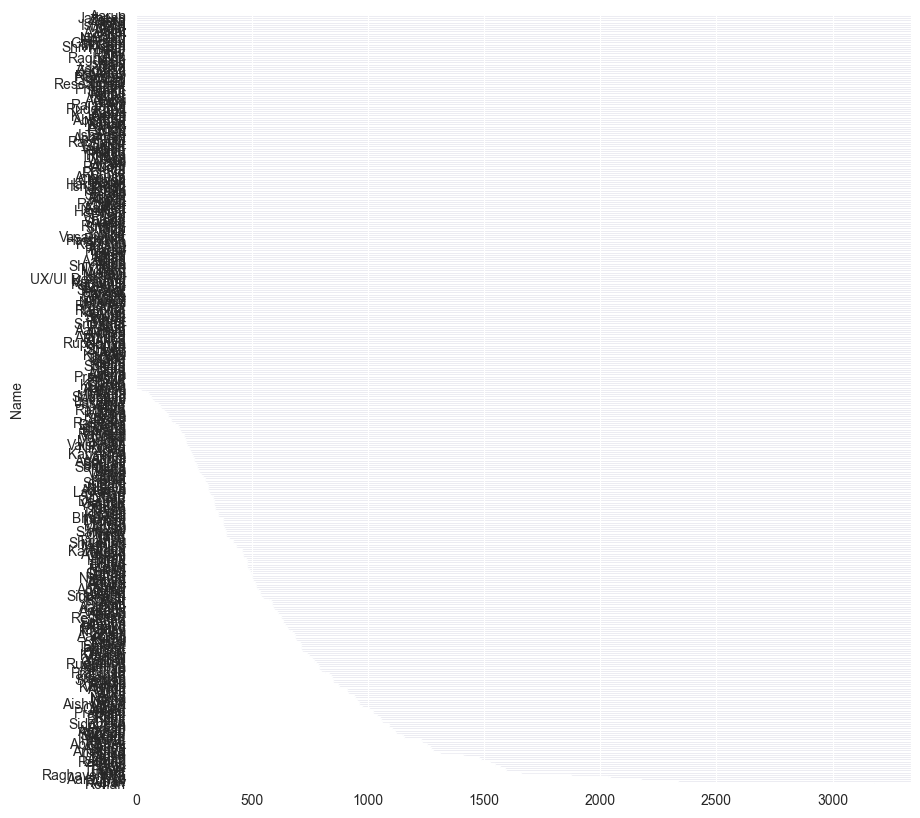

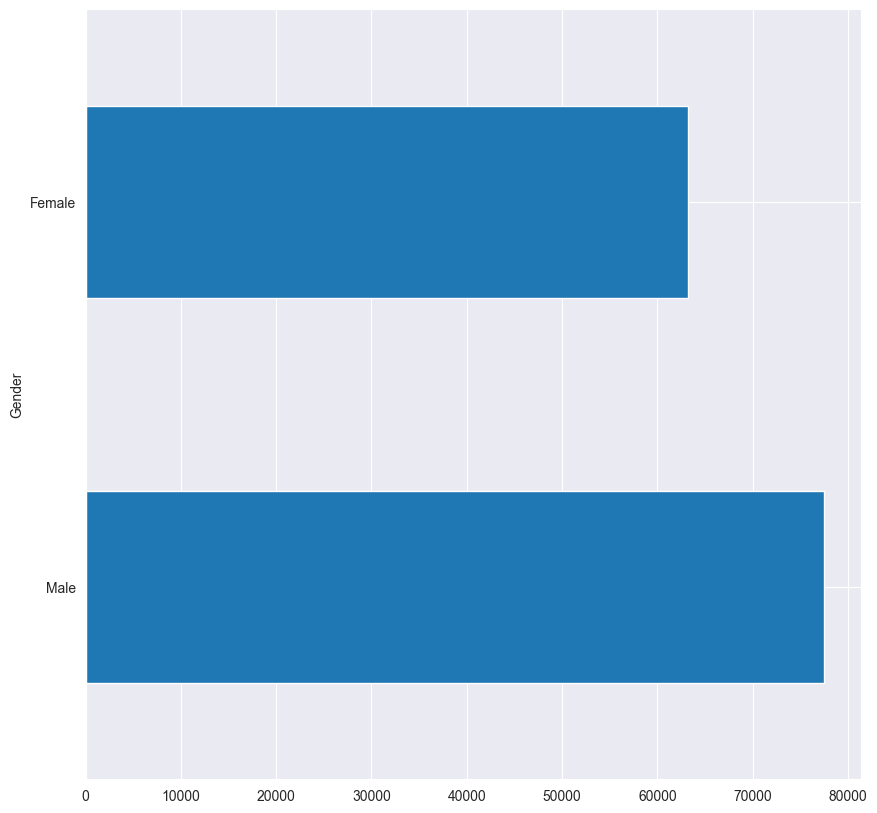

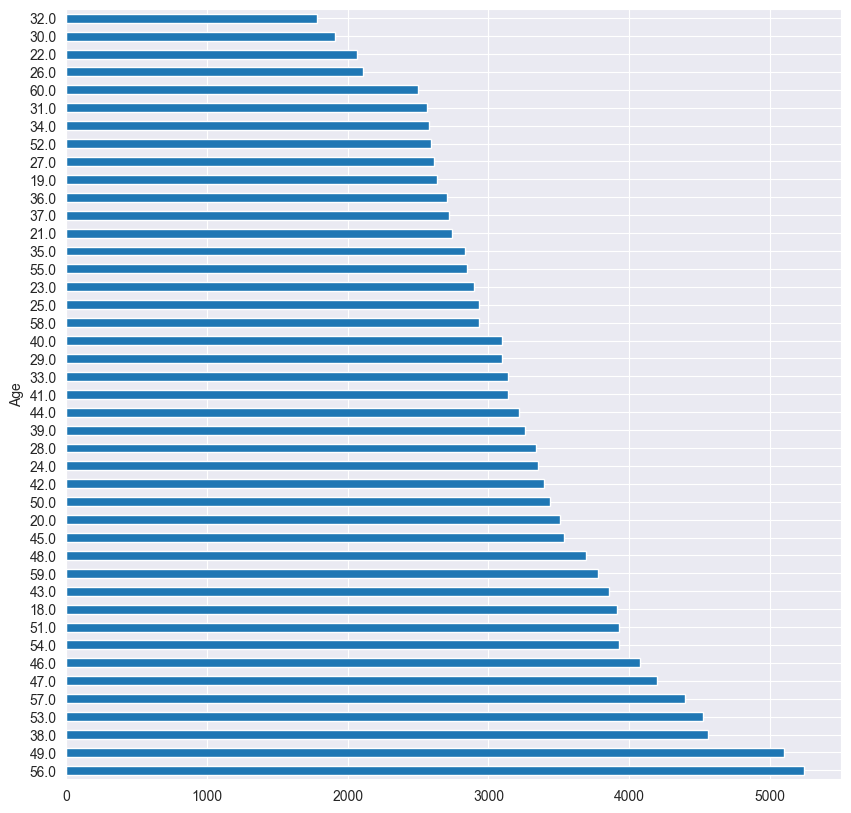

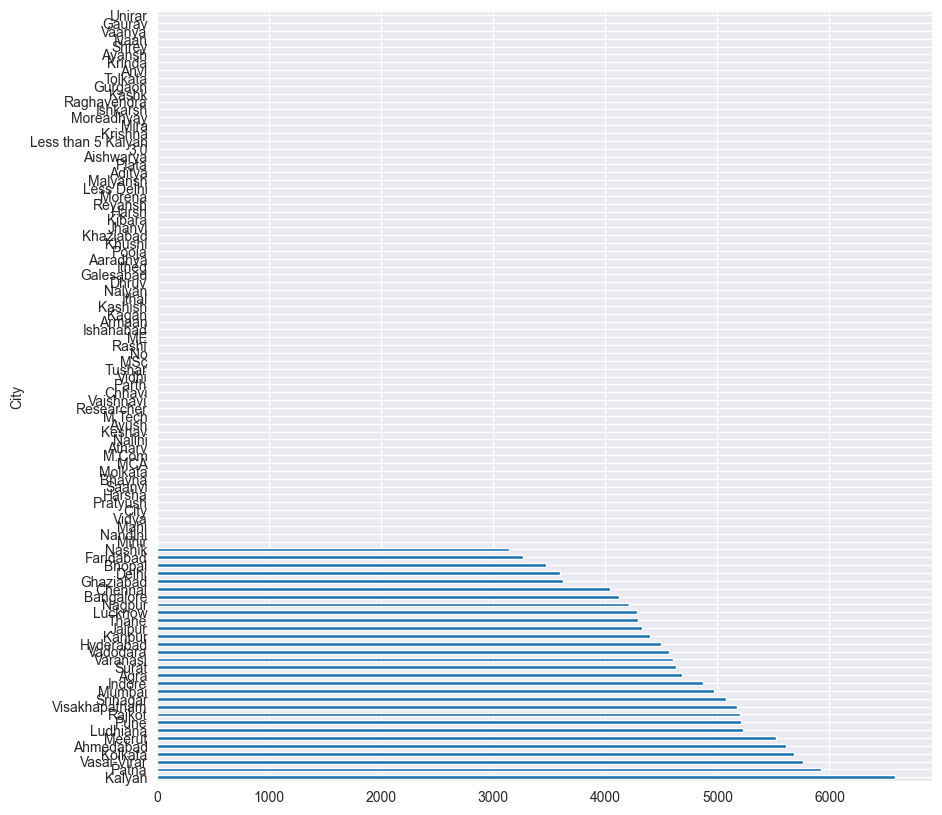

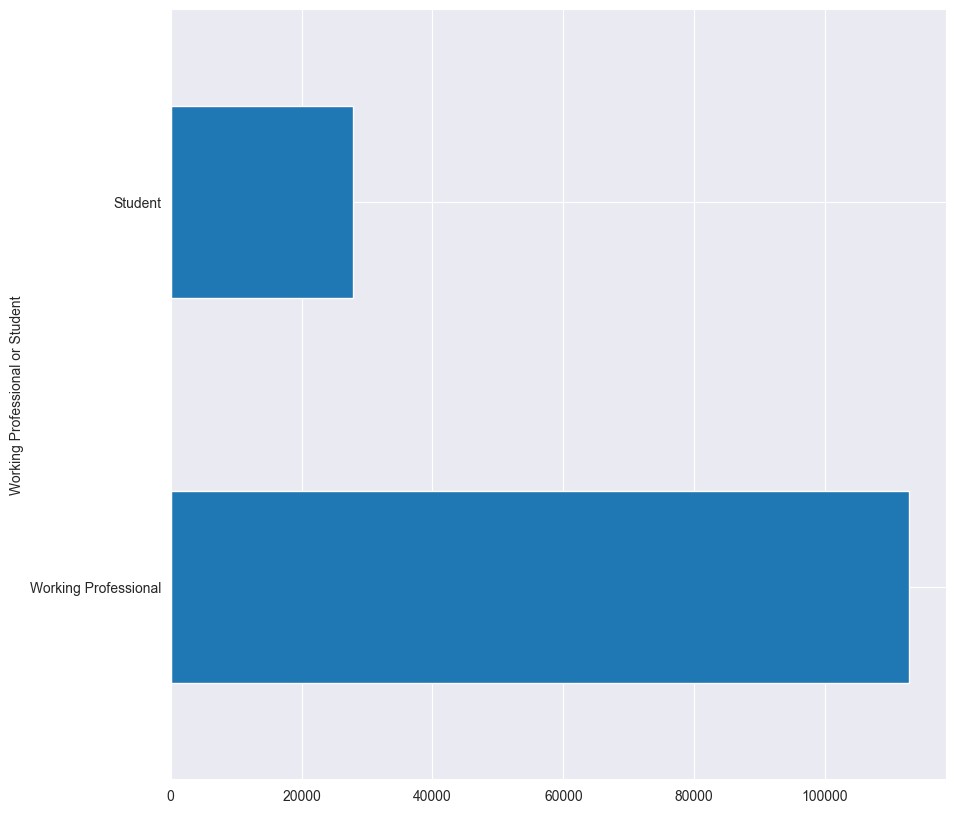

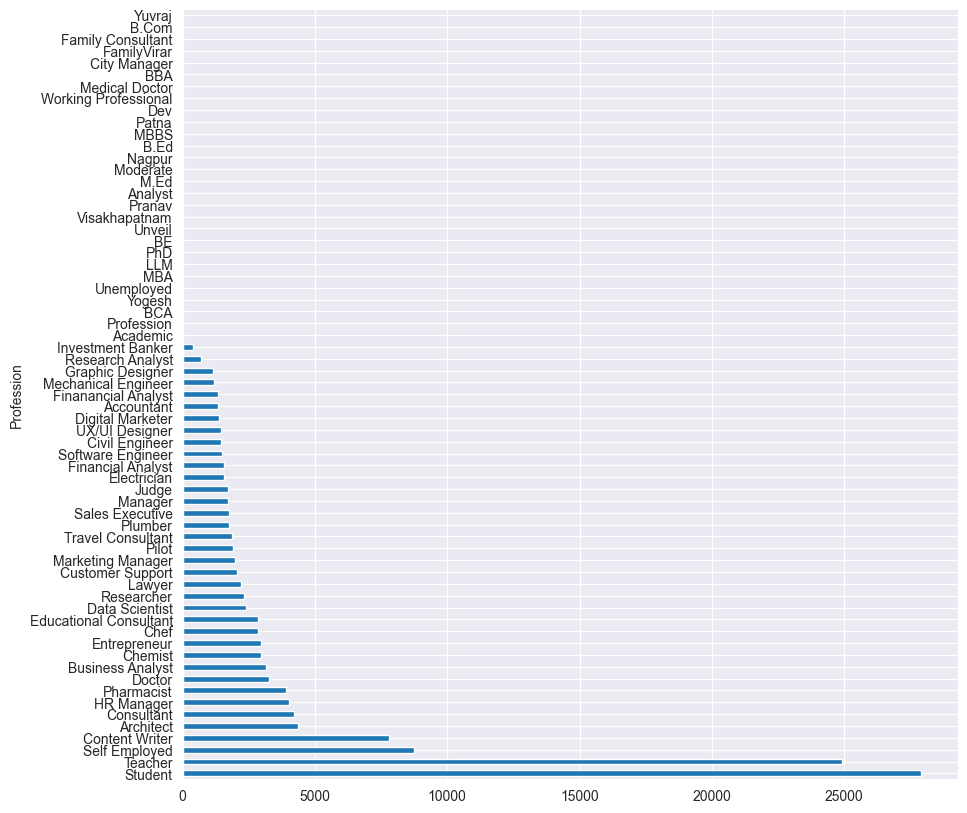

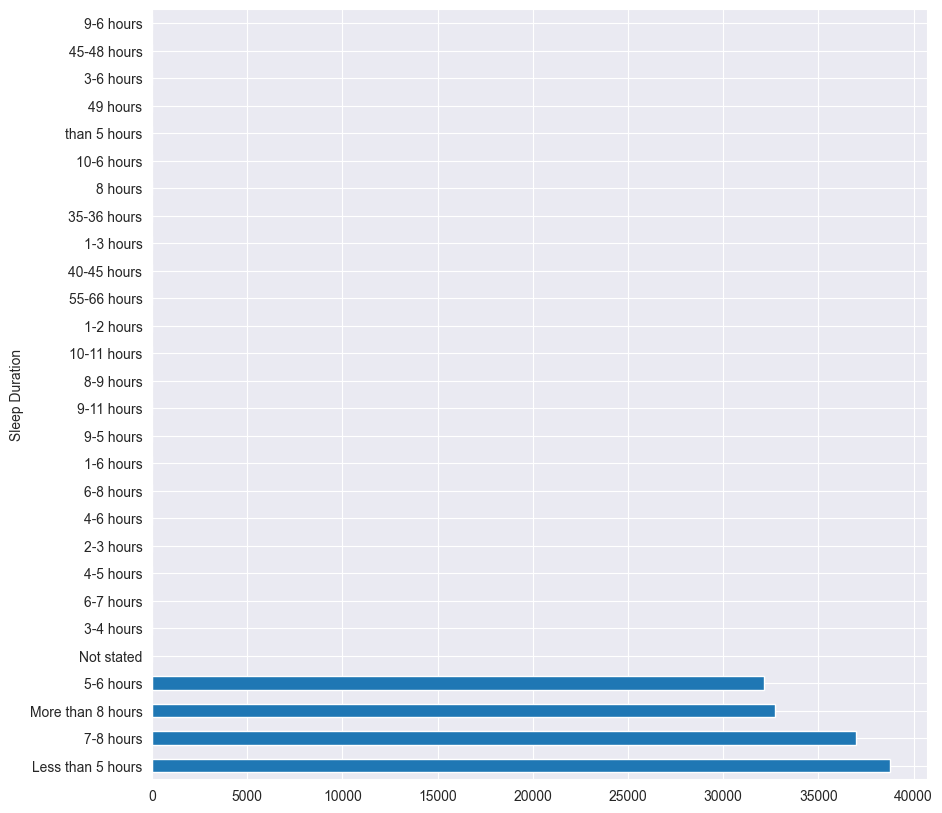

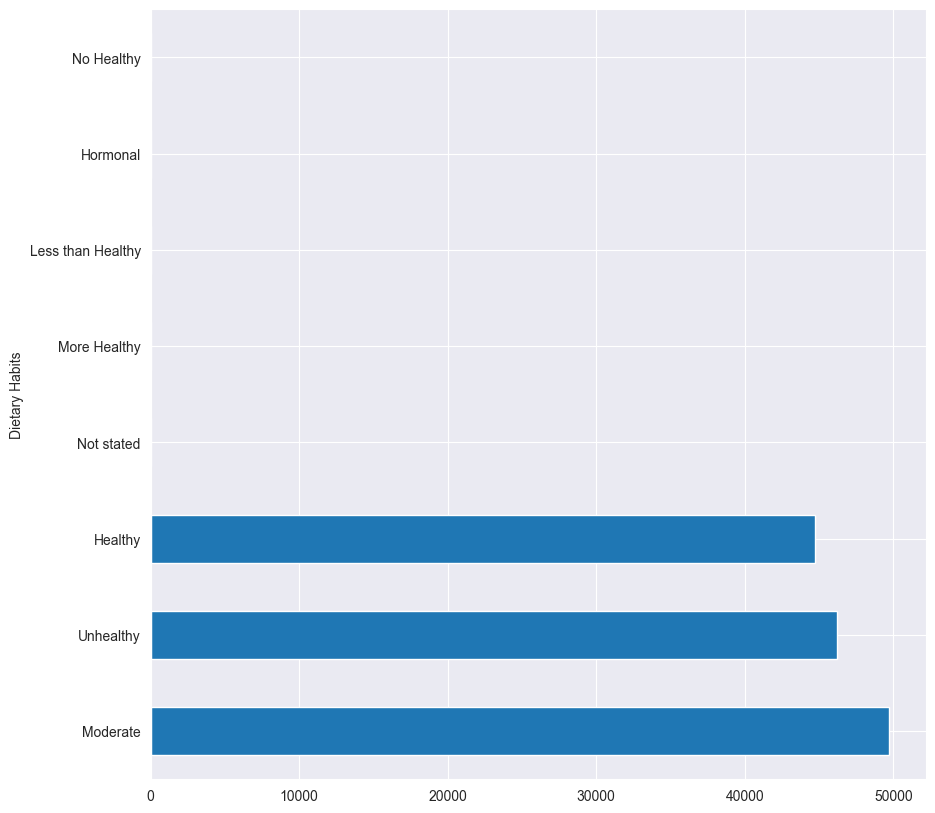

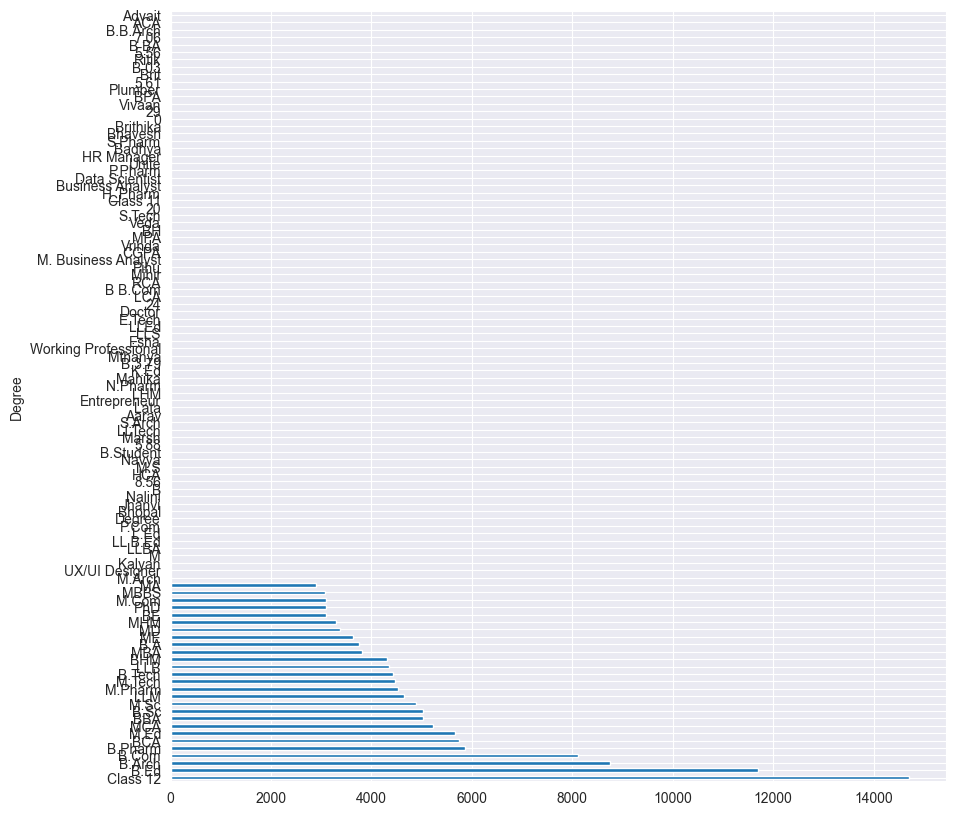

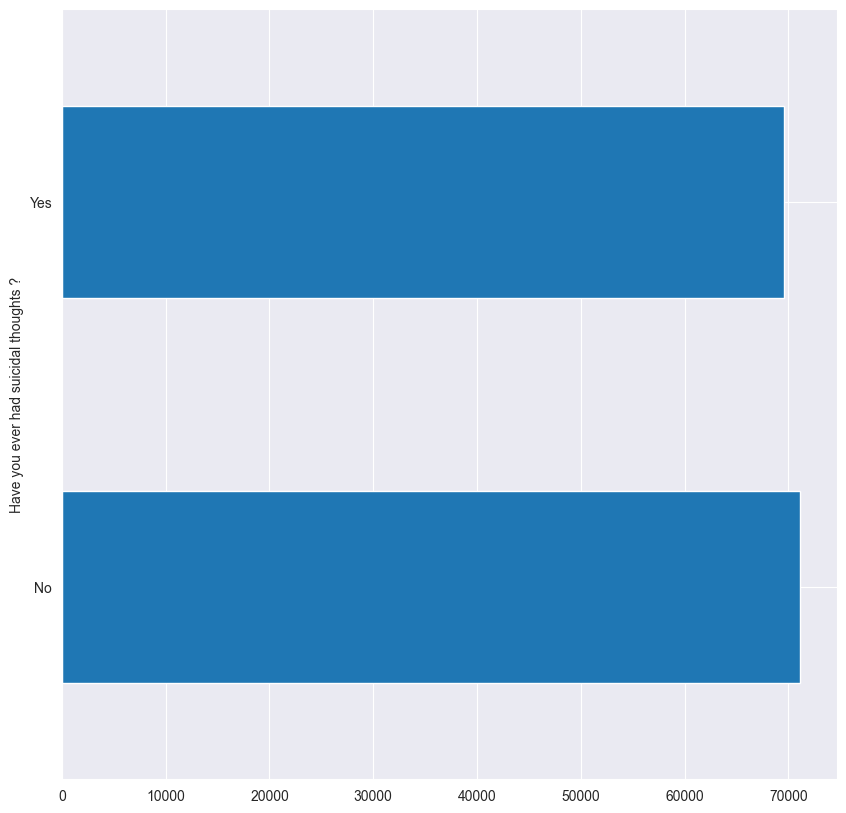

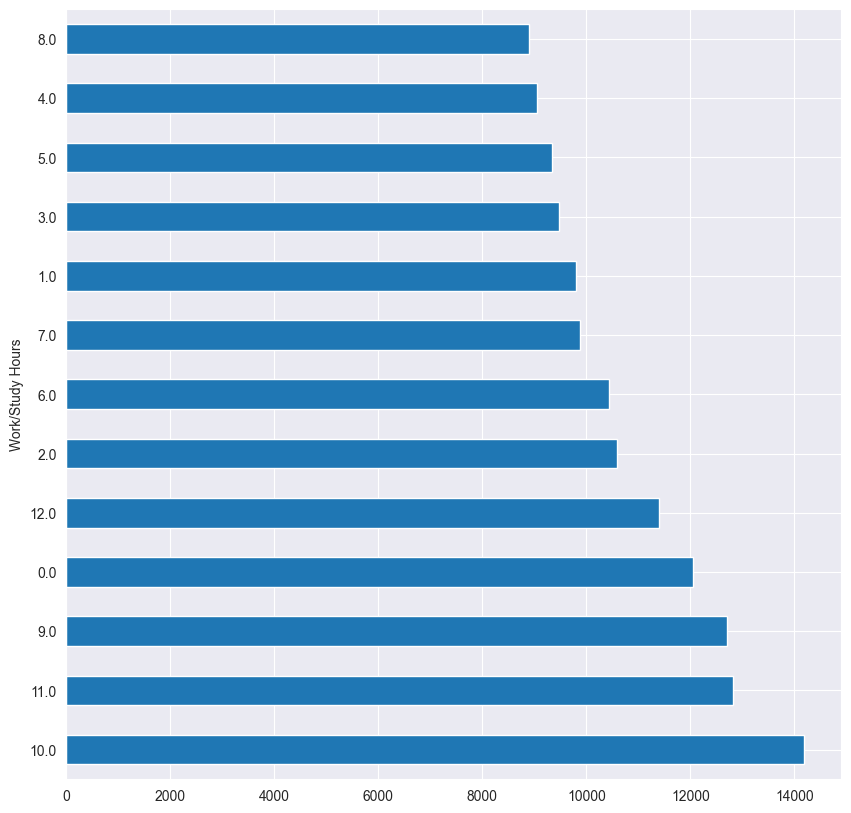

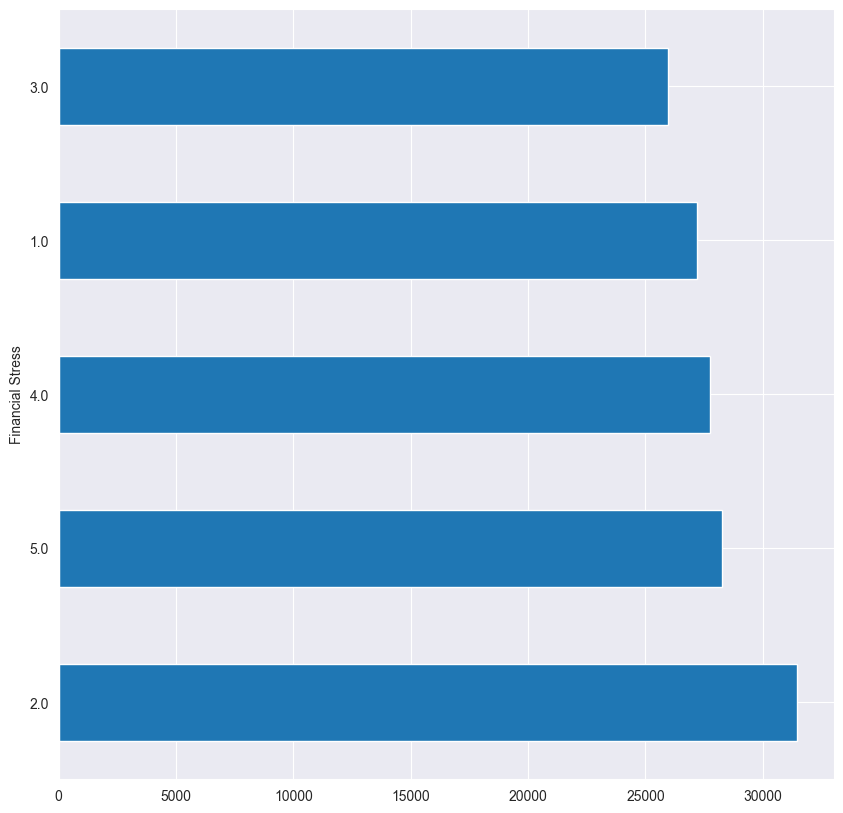

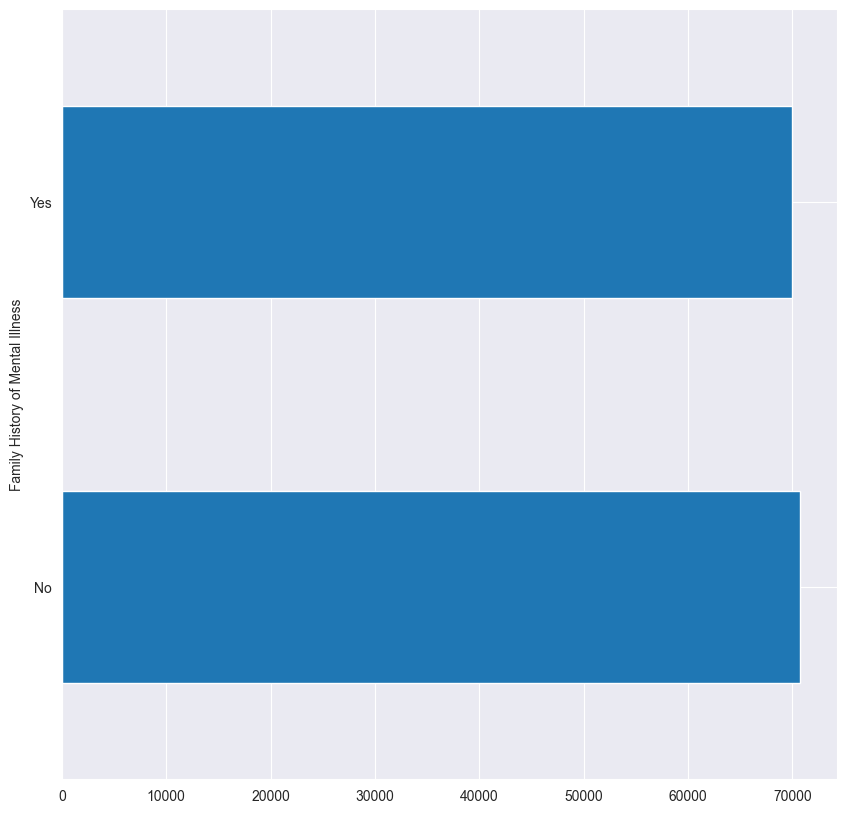

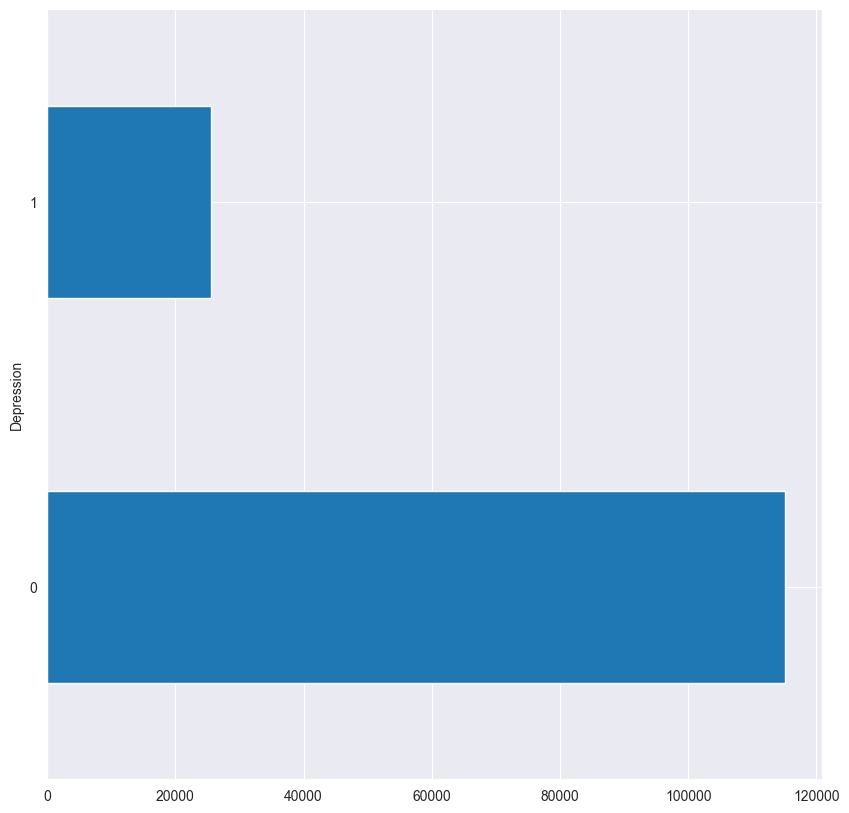

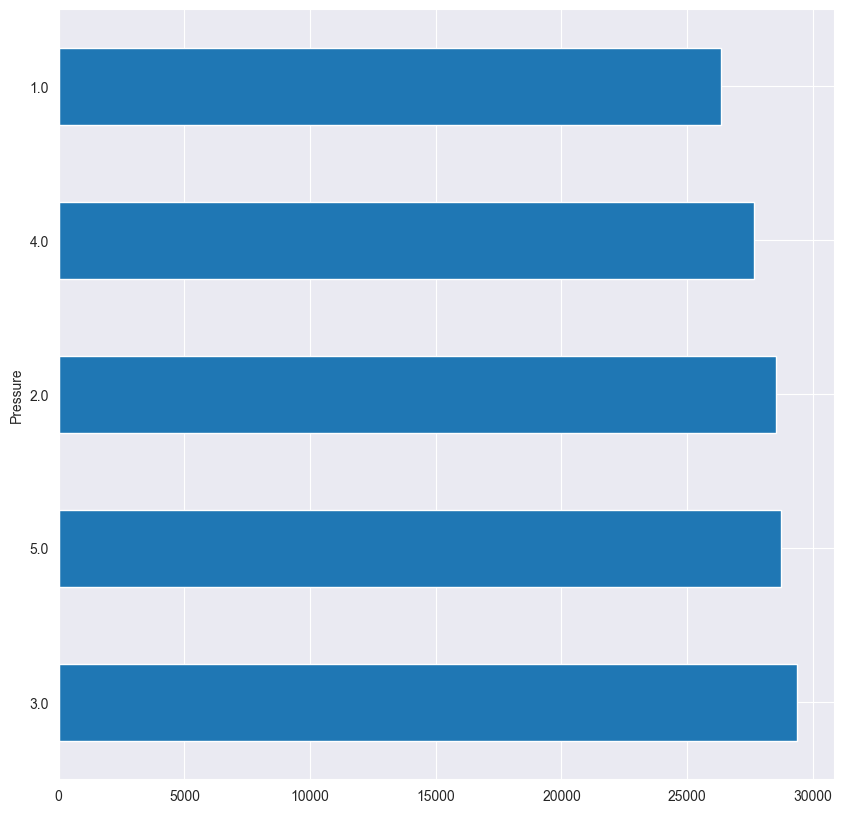

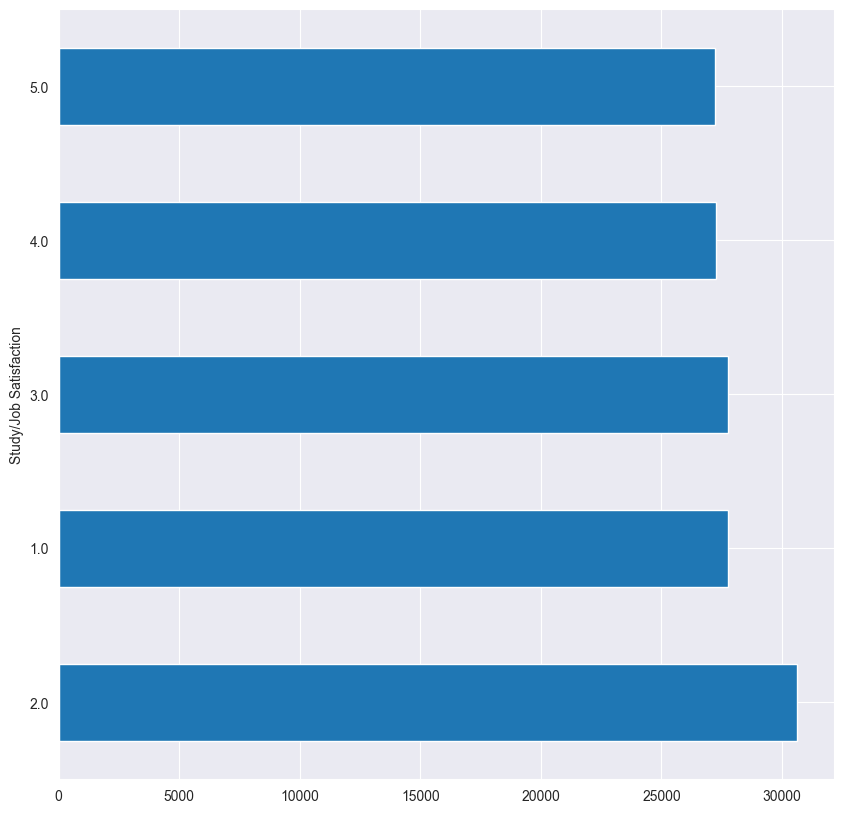

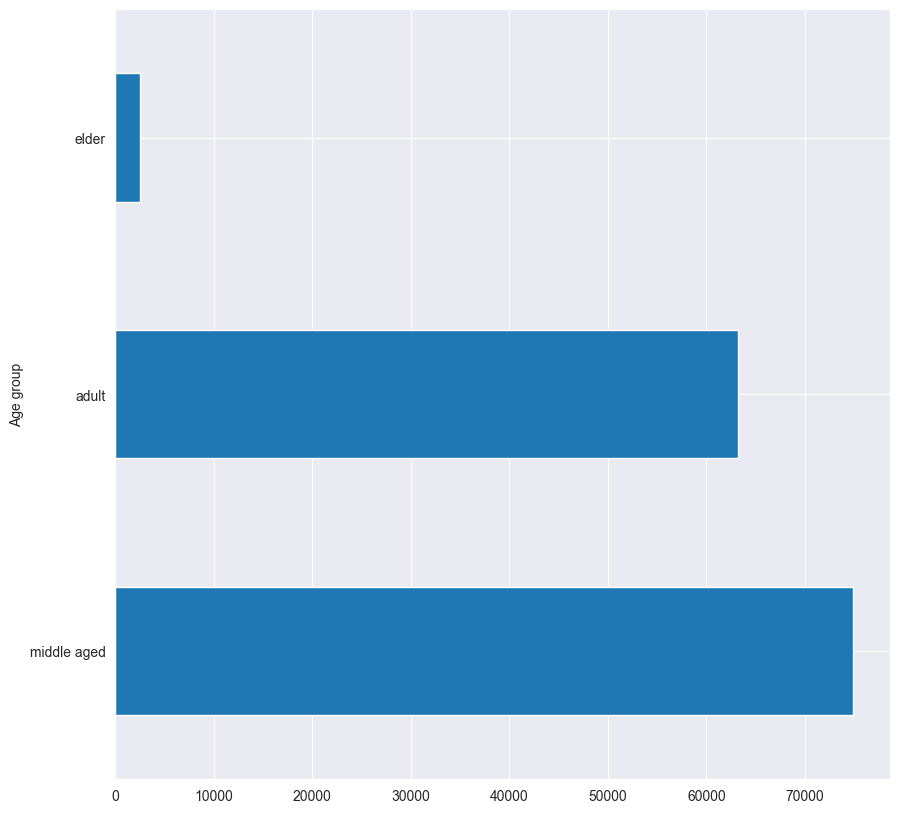

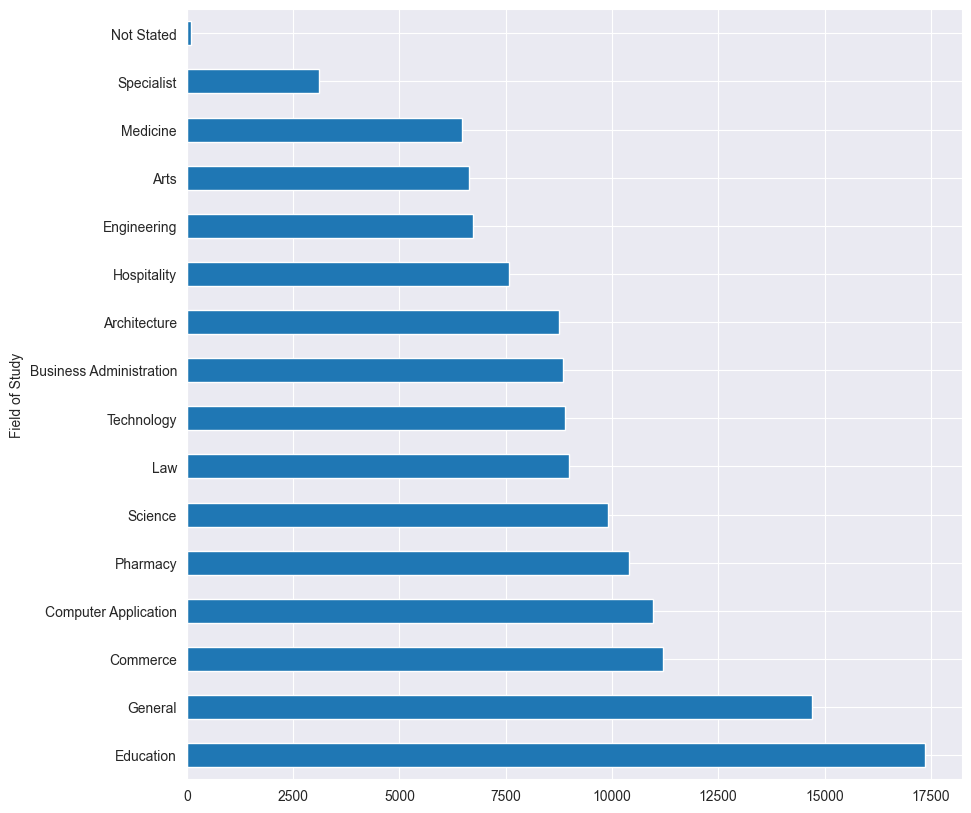

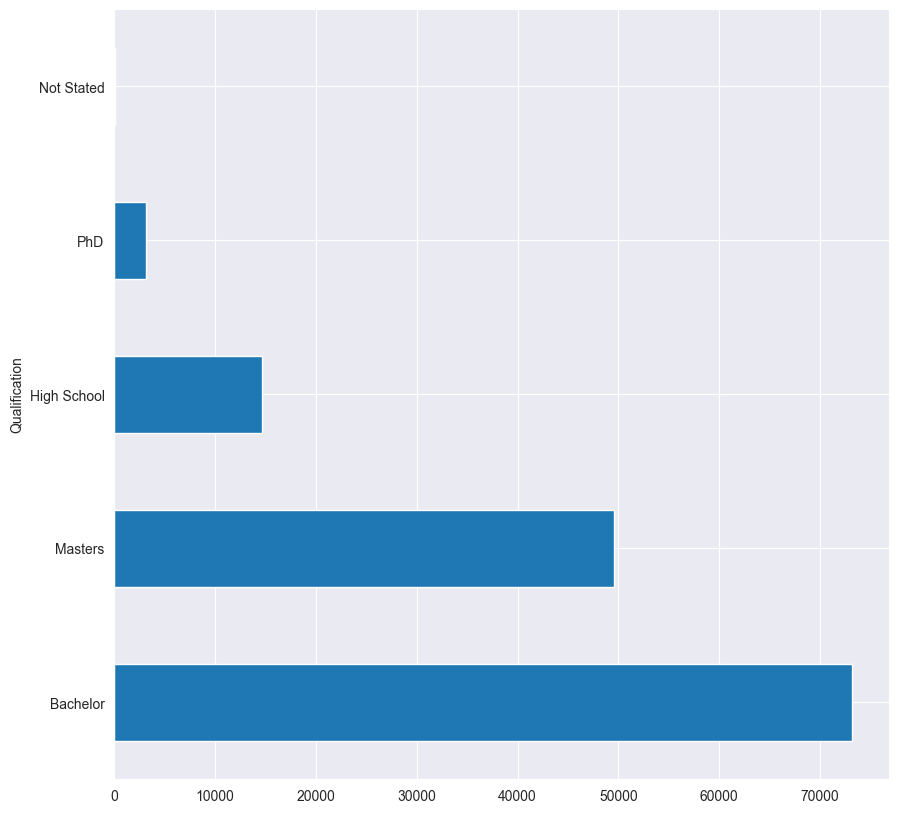

In [61]:
for feat in train_df.columns:
    counts = train_df[feat].value_counts()
    plt.figure(figsize=(10, 10))
    counts.plot(kind="barh")
    # sns.barplot(x=counts.index, y=counts.values,)

Saving dataset

In [ ]:
train_df.to_csv('data/train_df_featured.csv', index=False)
test_df.to_csv('data/test_df_featured.csv', index=False)